In [1]:
import pandas as pd # type: ignore
from sklearn.linear_model import LinearRegression # type: ignore
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
from sklearn.metrics import accuracy_score , mean_absolute_error,mean_squared_error , r2_score
from sklearn.svm import SVR
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
df = pd.read_csv('Life Expectancy Data.csv')
 

In [3]:
df.isna().sum()
# df.dtypes

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Life expectancy '}>,
        <Axes: title={'center': 'Adult Mortality'}>,
        <Axes: title={'center': 'infant deaths'}>],
       [<Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'percentage expenditure'}>,
        <Axes: title={'center': 'Hepatitis B'}>,
        <Axes: title={'center': 'Measles '}>],
       [<Axes: title={'center': ' BMI '}>,
        <Axes: title={'center': 'under-five deaths '}>,
        <Axes: title={'center': 'Polio'}>,
        <Axes: title={'center': 'Total expenditure'}>],
       [<Axes: title={'center': 'Diphtheria '}>,
        <Axes: title={'center': ' HIV/AIDS'}>,
        <Axes: title={'center': 'GDP'}>,
        <Axes: title={'center': 'Population'}>],
       [<Axes: title={'center': ' thinness  1-19 years'}>,
        <Axes: title={'center': ' thinness 5-9 years'}>,
        <Axes: title={'center': 'Income composition of resources'}>,
        <Axes: title={'center

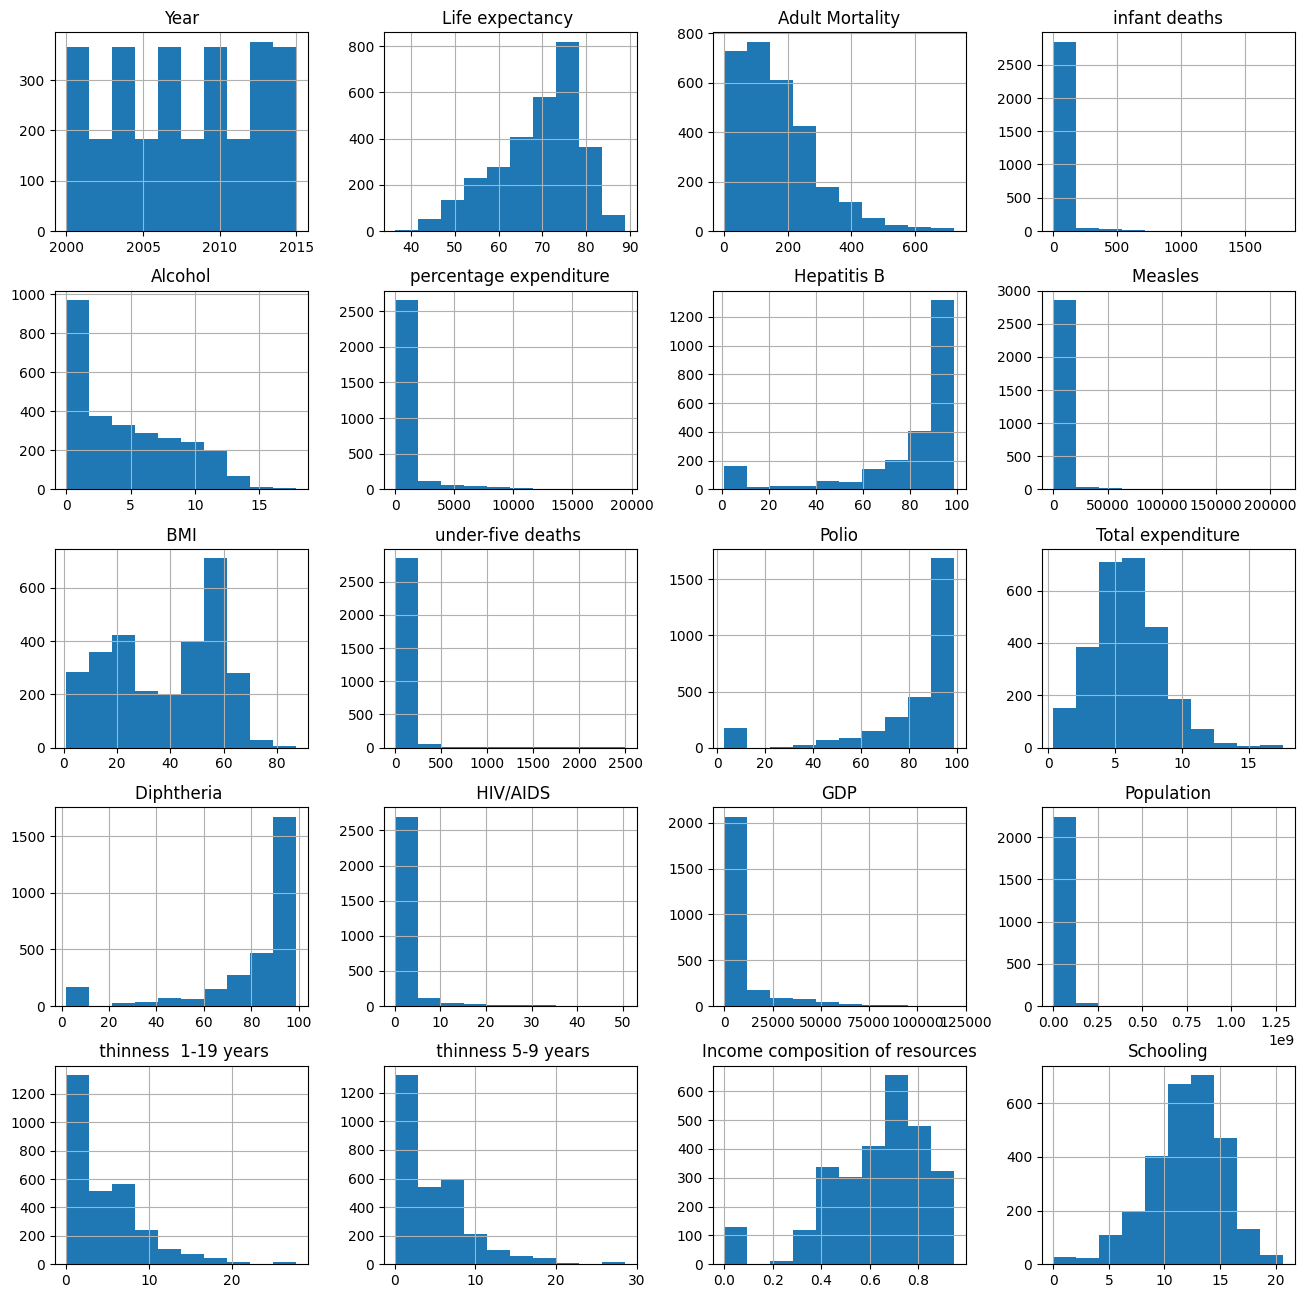

In [4]:
#before scalling
df.hist(figsize=(16,16),bins=10)

In [5]:
nan=[]
for column in df.columns:
  if df[column].isna().sum():
    nan.append(column)
print(nan)

['Life expectancy ', 'Adult Mortality', 'Alcohol', 'Hepatitis B', ' BMI ', 'Polio', 'Total expenditure', 'Diphtheria ', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [6]:
for column in nan:
    df[column] = df[column].fillna(df[column].mean())
    
df.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [7]:
df.Status.value_counts()

Status
Developing    2426
Developed      512
Name: count, dtype: int64

In [8]:
encoder=LabelEncoder()
df["Status"]= encoder.fit_transform(df["Status"])
df.Status.value_counts()

Status
1    2426
0     512
Name: count, dtype: int64

In [9]:
df.drop("Country",inplace=True,axis=1)


In [10]:
x = df.drop('Life expectancy ',axis =1)
y = df['Life expectancy '] 

In [11]:
scaler= StandardScaler()
x= scaler.fit_transform(x)

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>],
       [<Axes: title={'center': '4'}>, <Axes: title={'center': '5'}>,
        <Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>],
       [<Axes: title={'center': '8'}>, <Axes: title={'center': '9'}>,
        <Axes: title={'center': '10'}>, <Axes: title={'center': '11'}>],
       [<Axes: title={'center': '12'}>, <Axes: title={'center': '13'}>,
        <Axes: title={'center': '14'}>, <Axes: title={'center': '15'}>],
       [<Axes: title={'center': '16'}>, <Axes: title={'center': '17'}>,
        <Axes: title={'center': '18'}>, <Axes: title={'center': '19'}>]],
      dtype=object)

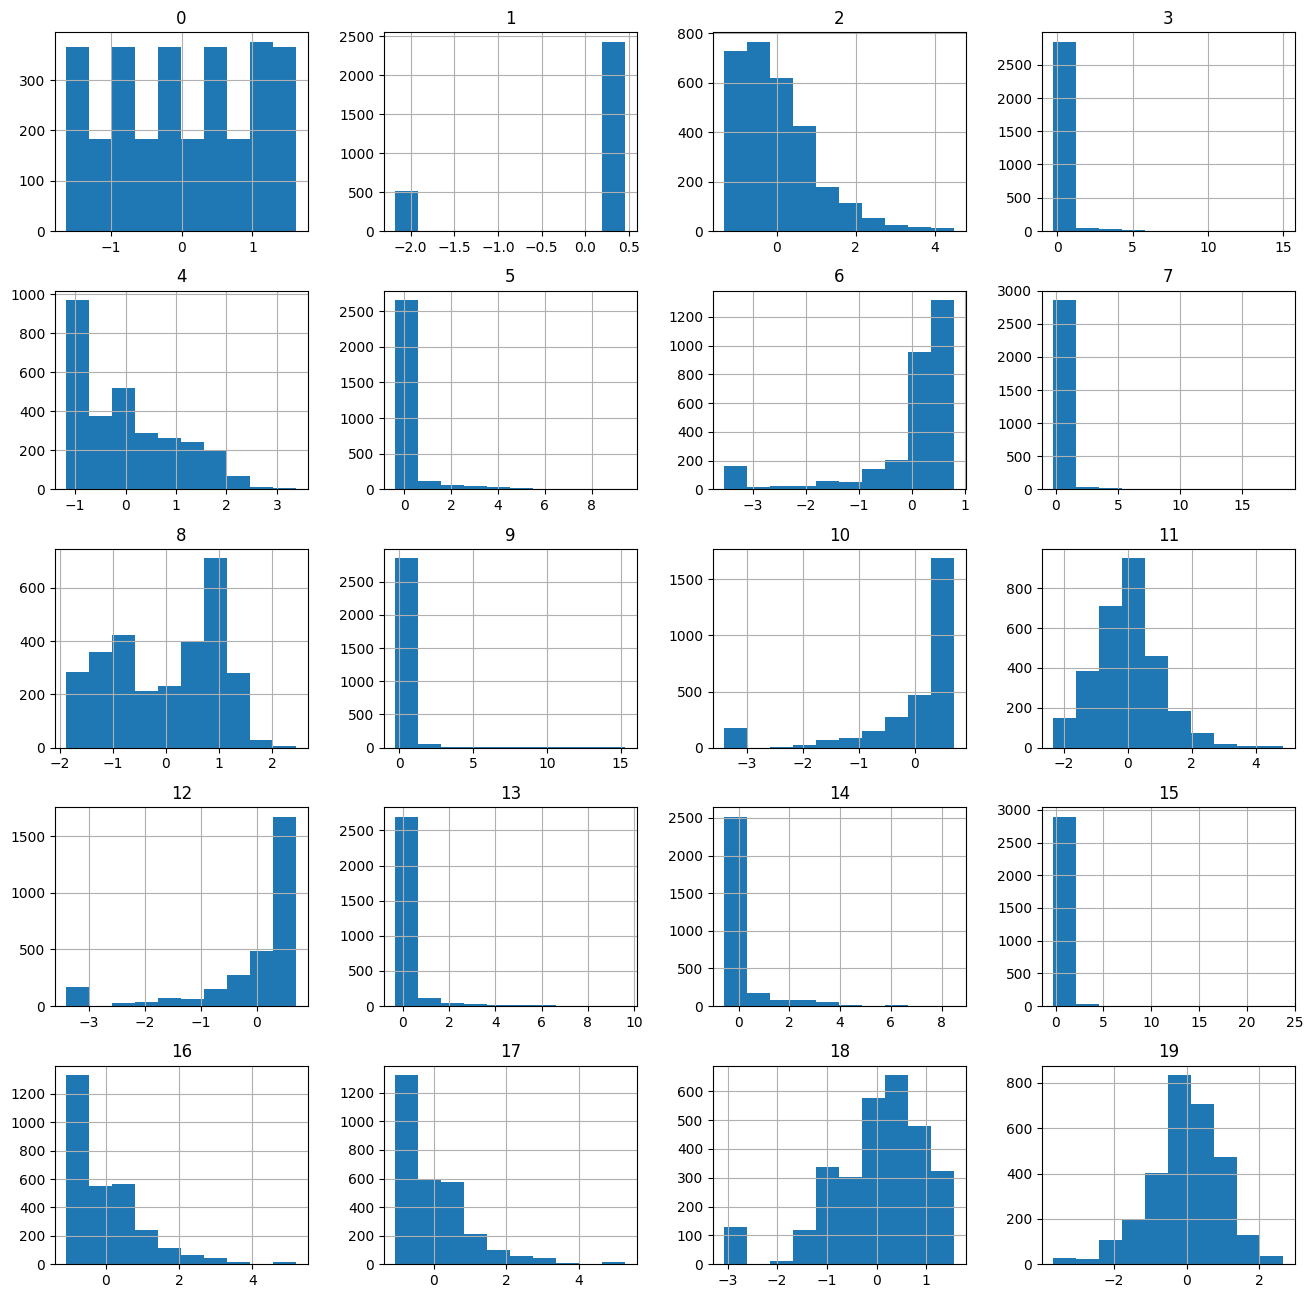

In [13]:
#after scalling
pd.DataFrame(x).hist(figsize=(16,16),bins=10)

In [14]:
lg=LinearRegression()
lg.fit(x_train,y_train)
y_pred=lg.predict(x_test)


In [15]:
mae= mean_absolute_error(y_test,y_pred)
mse= mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred) 
print(f"mean_absolute_error:{mae:.4f}")
print(f"mean_squared_error:{mse:.4f}")
print(f"R-score (R²): {r2:.4f}")

mean_absolute_error:2.8583
mean_squared_error:15.2429
R-score (R²): 0.8241


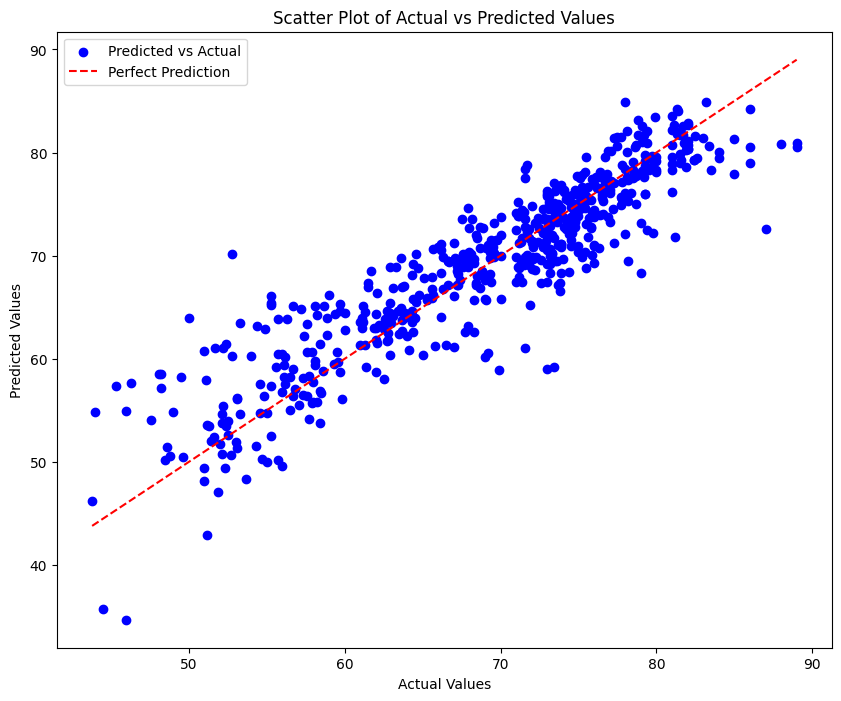

In [16]:
mae = 2.8583 
mse = 15.2429 
r_squared = 0.8241  
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Scatter Plot of Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [17]:
# print(f"Coefficients: \n{lg.coef_}\n")
# print(f"Intercept: {lg.intercept_}")

In [18]:
SVR=SVR()
SVR.fit(x_train,y_train)
y_pred=SVR.predict(x_test)

In [19]:
mae= mean_absolute_error(y_test,y_pred)
mse= mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred) 
print(f"mean_absolute_error:{mae:.4f}")
print(f"mean_squared_error:{mse:.4f}")
print(f"R-score (R²): {r2:.4f}")

mean_absolute_error:2.2698
mean_squared_error:10.7337
R-score (R²): 0.8761


In [20]:
# mae = 2.2698
# mse = 10.7337 
# r_squared = 0.8761  
# plt.figure(figsize=(10, 6))
# plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
# plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
# plt.title('Scatter Plot of Actual vs Predicted Values')
# plt.xlabel('Actual Values')
# plt.ylabel('Predicted Values')
# plt.legend()
# plt.show()